In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10, 10)})

In [35]:
df_main = pd.read_csv('../full_adult_clean.csv')
labels = pd.read_csv('../adult_labels.csv')
df_main.head()
# read clean data + labels previously saved in KNN lab#

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,is_married,has_children,is_white,from_US
0,25,7,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,38,9,1,0,0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
2,28,12,1,0,0,40,0,1,0,0,...,0,0,1,0,0,0,1,0,1,1
3,44,10,1,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,34,6,1,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [36]:
def print_results(y_true, y_pred):
    print(confusion_matrix(y_true, y_pred))
    print('F1-score:', f1_score(y_true, y_pred))
    print('precision-score:', precision_score(y_true, y_pred))
    print('recall-score:', recall_score(y_true, y_pred))
    print('roc_auc-score:', roc_auc_score(y_true, y_pred))
def plot_validation_curve(model_grid, param_name, params=None):
    results_df = pd.DataFrame(model_grid.cv_results_)
    
    if params == None:
        plt.plot(results_df['param_'+param_name], results_df['mean_test_score'])
    else:
        plt.plot(params, results_df['mean_test_score'])

    plt.xlabel(param_name)
    plt.ylabel('Test F1 score')
    plt.title('Validation curve')
    plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df_main)
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, 
                                             test_size=0.3, random_state=2021) 

In [38]:
from sklearn.linear_model import RidgeClassifier, PassiveAggressiveClassifier

ridge_classif = RidgeClassifier()
ridge_classif.fit(X_train, y_train)
y_pred = ridge_classif.predict(X_valid)
print_results(y_valid, y_pred)

[[9745  580]
 [1674 1811]]
F1-score: 0.6164057181756297
precision-score: 0.7574236721037223
recall-score: 0.5196556671449067
roc_auc-score: 0.7317406665022353


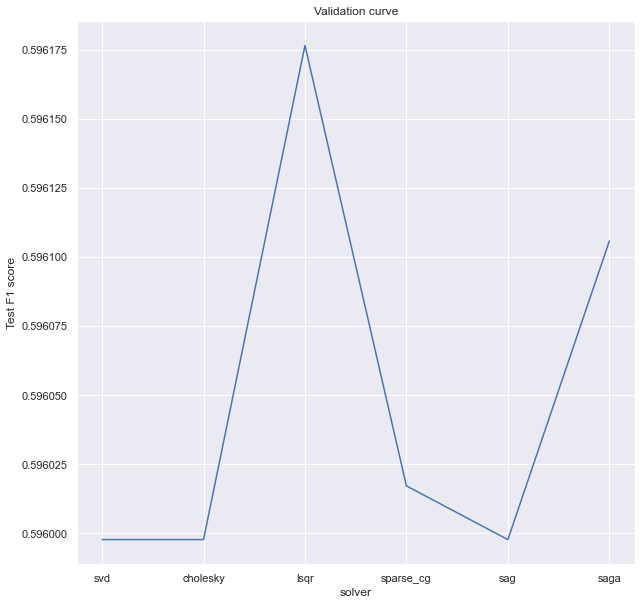

Best (hyper)parameters: {'solver': 'lsqr'}
Best score: 0.5961765282175273
[[22818  1468]
 [ 3933  4004]]
F1-score: 0.5972108285479901
precision-score: 0.7317251461988304
recall-score: 0.5044727226911931
roc_auc-score: 0.722013187500583


In [39]:
param_grid = {'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
model_grid = GridSearchCV(ridge_classif, param_grid, cv=5, scoring='f1', n_jobs=-1)
model_grid.fit(X_train, y_train)
plot_validation_curve(model_grid, 'solver')
print('Best (hyper)parameters:', model_grid.best_params_)
print('Best score:', model_grid.best_score_)
y_pred = model_grid.best_estimator_.predict(X_train)
print_results(y_train, y_pred)

In [40]:
pas_agr_classif = PassiveAggressiveClassifier(warm_start=False, loss='squared_hinge', random_state=1)
pas_agr_classif.fit(X_train, y_train)
y_pred = pas_agr_classif.predict(X_valid)
print_results(y_valid, y_pred)

[[7941 2384]
 [ 845 2640]]
F1-score: 0.6205194499941239
precision-score: 0.5254777070063694
recall-score: 0.757532281205165
roc_auc-score: 0.7633181987139627
